# Pakistan Import / Export Analysis

This data contains all the imports and exports of Pakistan. 
This is a visualized comparison of the trade over the years from 2015 to 2019. 
The data was collected from www.pbs.gov.pk -- the official website of Beauru of Statistics Pakistan.

Dataset link: https://www.kaggle.com/datasets/idrisonkaggle/import-and-export-data-of-pakistan 

### Importing Libraries

In [250]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly
%matplotlib inline
import warnings  # to ignore warnings

warnings.filterwarnings('ignore')
import os

### Importing Dataset

In [251]:
imp_data = pd.read_csv("C:/Users/zahid/Downloads/Pakistan Import Export/Stripped imports.csv") # load import dataset
exp_data = pd.read_csv("C:/Users/zahid/Downloads/Pakistan Import Export/Stripped exports.csv") # load export dataset

### Introductory Details

In [252]:
imp_data.head(10)

,HSCode,Commodity,Unit,Country,Quantity,Value,Year
0,1012100,PURE BRED BREEDING HORSES,NO,Argentina,24,14924,2015
1,1012100,PURE BRED BREEDING HORSES,NO,Belgium,3,1678,2015
2,1012100,PURE BRED BREEDING HORSES,NO,United Kingdom,4,1245,2015
3,1019000,OTHER LIVE ANIMALS,NO,Argentina,6,1845,2015
4,1019000,OTHER LIVE ANIMALS,NO,Ireland,1001,6771,2015
5,1022110,PURE BRED BREEDING BULLS,NO,Australia,2,611,2015
6,1022120,PURE BRED BREEDING COWS,NO,Australia,1491,374028,2015
7,1022120,PURE BRED BREEDING COWS,NO,Netherlands,1930,451031,2015
8,1022920,OTHER LIVE COWS,NO,Australia,38,6492,2015
9,1051100,FOWLS (CHICKEN) WT UPTO 185G,NO,France,190882,149753,2015


In [253]:
exp_data.head(10)

,HSCode,Commodity,Unit,Country,Quantity,Value,Year
0,1019000,OTHER LIVE ANIMALS,NO,Germany,1,151,2015
1,1051100,FOWLS (CHICKEN) WT UPTO 185G,NO,Oman,1815,752,2015
2,1051100,FOWLS (CHICKEN) WT UPTO 185G,NO,Tajikistan,2900,1232,2015
3,1059400,OTH FOWLS OF THE SPE (CHICKEN),NO,Oman,3445,348,2015
4,1059900,OTH LIVE POULTRY,NO,Afghanistan,2315653,230074,2015
5,1059900,OTH LIVE POULTRY,NO,Malaysia,50,50,2015
6,1059900,OTH LIVE POULTRY,NO,Oman,8544,3081,2015
7,1059900,OTH LIVE POULTRY,NO,Tajikistan,14000,1232,2015
8,1063200,PSITTACIFORMES(INCL.PARROTS),NO,Bahrain,4080,1252,2015
9,1063200,PSITTACIFORMES(INCL.PARROTS),NO,Indonesia,401,160,2015


In [254]:
imp_data.tail()

,HSCode,Commodity,Unit,Country,Quantity,Value,Year
305516,99100000,SAMPLES HAVING NO-COMMER VALUE,VAL,O.Asia(Tai.For.Pe.Ki,NaN,101,2019
305517,99100000,SAMPLES HAVING NO-COMMER VALUE,VAL,Poland,NaN,110,2019
305518,99100000,SAMPLES HAVING NO-COMMER VALUE,VAL,Thailand,NaN,27,2019
305519,99100000,SAMPLES HAVING NO-COMMER VALUE,VAL,United Arab Emirates,NaN,2198,2019
305520,99100000,SAMPLES HAVING NO-COMMER VALUE,VAL,United Kingdom,NaN,265,2019


In [255]:
exp_data.tail()

,HSCode,Commodity,Unit,Country,Quantity,Value,Year
175014,96190090,OTHER SANITARY ARTICLES,DOZ,Japan,4549,21805,2019
175015,96200000,"MONOPODS, BIPODS, TRIPODS",NO,Germany,3,161,2019
175016,97011000,"PAINTING,DRAWING,PASTELS.",NO,United Arab Emirates,19,411,2019
175017,97019000,OTH COLLAGES&SIMI DECORATIVE,NO,Australia,3,146,2019
175018,97030000,ORIGINAL SCULPTURES&STATUARY,NO,U.S.America,2,229,2019


In [256]:
# Import data info
imp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305521 entries, 0 to 305520
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   HSCode     305521 non-null  int64  
 1   Commodity  305521 non-null  object 
 2   Unit       305521 non-null  object 
 3   Country    305521 non-null  object 
 4   Quantity   298728 non-null  float64
 5   Value      305521 non-null  int64  
 6   Year       305521 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 16.3+ MB


In [257]:
# Export data info
exp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175019 entries, 0 to 175018
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   HSCode     175019 non-null  int64  
 1   Commodity  175019 non-null  object 
 2   Unit       175019 non-null  object 
 3   Country    175019 non-null  object 
 4   Quantity   173298 non-null  float64
 5   Value      174999 non-null  float64
 6   Year       175019 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 9.3+ MB


In [258]:
# import describe
imp_data.describe(include='all')

,HSCode,Commodity,Unit,Country,Quantity,Value,Year
count,305521,305521,305521,305521,298728,305521,305521
unique,NaN,6802,13,243,NaN,NaN,NaN
top,NaN,SAMPLES HAVING NO-COMMER VALUE,KG,China,NaN,NaN,NaN
freq,NaN,806,153783,26706,NaN,NaN,NaN
mean,63602257,NaN,NaN,NaN,383622,91444,2017
std,25220469,NaN,NaN,NaN,28068208,2028040,1
min,1012100,NaN,NaN,NaN,1,1,2015
25%,39211300,NaN,NaN,NaN,40,130,2016
50%,73079200,NaN,NaN,NaN,422,1041,2017
75%,84835090,NaN,NaN,NaN,5604,8546,2018


In [259]:
# export describe
exp_data.describe(include='all')

,HSCode,Commodity,Unit,Country,Quantity,Value,Year
count,175019,175019,175019,175019,173298,174999,175019
unique,NaN,5202,14,221,NaN,NaN,NaN
top,NaN,"OTH INST,APP MEDICAL/SUR/VETEN",KG,United Arab Emirates,NaN,NaN,NaN
freq,NaN,852,69914,8712,NaN,NaN,NaN
mean,55476003,NaN,NaN,NaN,261690,76569,2017
std,23843787,NaN,NaN,NaN,3688200,787601,1
min,1019000,NaN,NaN,NaN,1,1,2015
25%,41139000,NaN,NaN,NaN,133,274,2016
50%,61051000,NaN,NaN,NaN,1526,1871,2017
75%,68041000,NaN,NaN,NaN,18675,12397,2018


In [260]:
# import describe on bases of objects
imp_data.describe(include='object')

,Commodity,Unit,Country
count,305521,305521,305521
unique,6802,13,243
top,SAMPLES HAVING NO-COMMER VALUE,KG,China
freq,806,153783,26706


In [261]:
# export describe on bases of objects
exp_data.describe(include='object')

,Commodity,Unit,Country
count,175019,175019,175019
unique,5202,14,221
top,"OTH INST,APP MEDICAL/SUR/VETEN",KG,United Arab Emirates
freq,852,69914,8712


In [262]:
imp_data.index

RangeIndex(start=0, stop=305521, step=1)

In [263]:
exp_data.index

RangeIndex(start=0, stop=175019, step=1)

In [264]:
imp_data.columns

Index(['HSCode', 'Commodity', 'Unit', 'Country', 'Quantity', 'Value', 'Year'], dtype='object')

In [265]:
exp_data.columns

Index(['HSCode', 'Commodity', 'Unit', 'Country', 'Quantity', 'Value', 'Year'], dtype='object')

In [266]:
imp_data["Country"].unique()
exp_data["Country"].unique()

array(['Germany', 'Oman', 'Tajikistan', 'Afghanistan', 'Malaysia',
       'Bahrain', 'Indonesia', 'Kuwait', 'Russian Federation', 'Turkey',
       'Uzbekistan', 'Ghana', 'Jordan', 'Qatar', 'China',
       'Hong Kong S.A.Re.Chi', 'Saudi Arabia', 'Thailand',
       'United Arab Emirates', 'United Kingdom', 'Viet Nam',
       'Egypt(U.A.R.)', 'Iraq', 'Iran ( Islamic R.)', 'Spain', 'Yemen',
       'New Zealand', 'Australia', 'O.Asia(Tai.For.Pe.Ki', 'Canada',
       'Japan', 'Singapore', 'U.S.America', 'Mauritius', 'D.R.of Congo',
       'South Africa', 'Bangladesh', 'Belgium', 'Benin',
       'Korea, Republic of', 'Sri Lanka', 'Fiji', 'India', 'Lebanon',
       'Philippines', 'U.R.of Tanzania', 'Netherlands', 'Guinea', 'Libya',
       'Mozambique', 'Seychelles', 'Sweden', 'Ireland', 'Italy',
       'Trinidad and Tobago', 'Greece', 'Albania', 'Tunisia', 'Myanmar',
       'Bulgaria', 'Czech Republic', 'France', 'Hungary', 'Lithuania',
       'Morocco', 'Poland', 'Portugal', 'Romania', 'Nepal

In [267]:
# the dataset of import and export from the year 2015 to year 2019
imp_data["Year"].unique()
exp_data["Year"].unique()

array([2015, 2016, 2017, 2018, 2019], dtype=int64)

### Checking for missing or inconsistent data

In [268]:
# for Import data
imp_data.isnull().sum()

HSCode          0
Commodity       0
Unit            0
Country         0
Quantity     6793
Value           0
Year            0
dtype: int64

In [269]:
imp_data = imp_data.dropna()

In [270]:
imp_data.isnull().sum()

HSCode       0
Commodity    0
Unit         0
Country      0
Quantity     0
Value        0
Year         0
dtype: int64

In [271]:
# For export data
exp_data.isnull().sum()

HSCode          0
Commodity       0
Unit            0
Country         0
Quantity     1721
Value          20
Year            0
dtype: int64

In [272]:
exp_data = exp_data.dropna()

In [273]:
exp_data.isnull().sum()

HSCode       0
Commodity    0
Unit         0
Country      0
Quantity     0
Value        0
Year         0
dtype: int64

### Duplicate Values

In [274]:
imp_data.duplicated().sum()

0

In [275]:
exp_data.duplicated().sum()

0

### Insights

In [276]:
imp_mean_value = imp_data['Value'].mean() # mean of import data
imp_mean_value

93155.89027141748

In [277]:
imp_median_value = imp_data['Value'].median() # median of import data
imp_median_value

1079.0

In [278]:
imp_std_value = imp_data['Value'].std() # std of import data
imp_std_value

2050837.1321119326

In [279]:
exp_mean_value = exp_data['Value'].mean() # mean of export data
exp_mean_value

77284.57531250361

In [280]:
exp_median_value = exp_data['Value'].median() # median of export data
exp_median_value

1912.0

In [281]:
exp_std_value = exp_data['Value'].std() # std of export data
exp_std_value

791464.0231889783

In [282]:
# Import with No. of countries and different commodities

num_countries = len(imp_data['Country'].unique())
num_items = len(imp_data['Commodity'].unique())

print('Pakistan imports from', num_countries, 'different countries.')
print('Pakistan imports', num_items, 'different items.')


Pakistan imports from 241 different countries.
Pakistan imports 6753 different items.


In [283]:
# Export with No. of countries and different commodities

num_countries = len(exp_data['Country'].unique())
num_items = len(exp_data['Commodity'].unique())

print('Pakistan exports to', num_countries, 'different countries.')
print('Pakistan exports', num_items, 'different items.')

Pakistan exports to 221 different countries.
Pakistan exports 5156 different items.


### Visualization

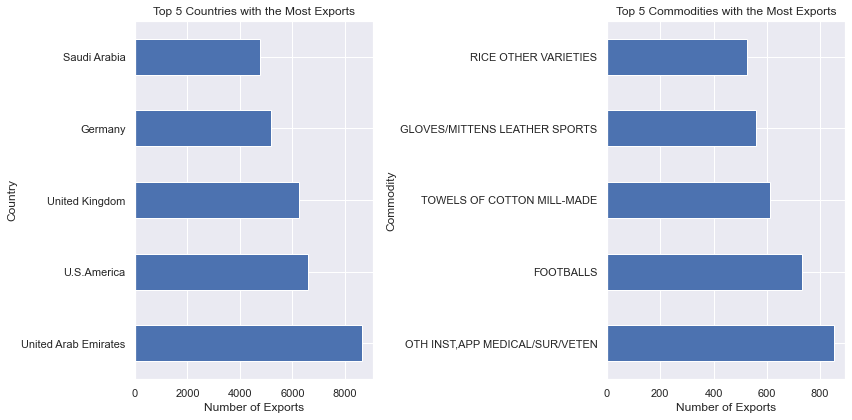

In [298]:
# Looking for most popular commodities and countries in exports

Country_data = pd.DataFrame(exp_data['Country'].value_counts())
Commodity_data = pd.DataFrame(exp_data['Commodity'].value_counts())

# Create subplots with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

# Plot the top 5 countries
top_countries = Country_data.head(5)
top_countries.plot(kind='barh', ax=ax1, legend=None)
ax1.set_title('Top 5 Countries with the Most Exports')
ax1.set_xlabel('Number of Exports')
ax1.set_ylabel('Country')

# Plot the top 5 commodities
top_commodities = Commodity_data.head(5)
top_commodities.plot(kind='barh', ax=ax2, legend=None)
ax2.set_title('Top 5 Commodities with the Most Exports')
ax2.set_xlabel('Number of Exports')
ax2.set_ylabel('Commodity')

plt.tight_layout()  # adjust the layout
plt.show()


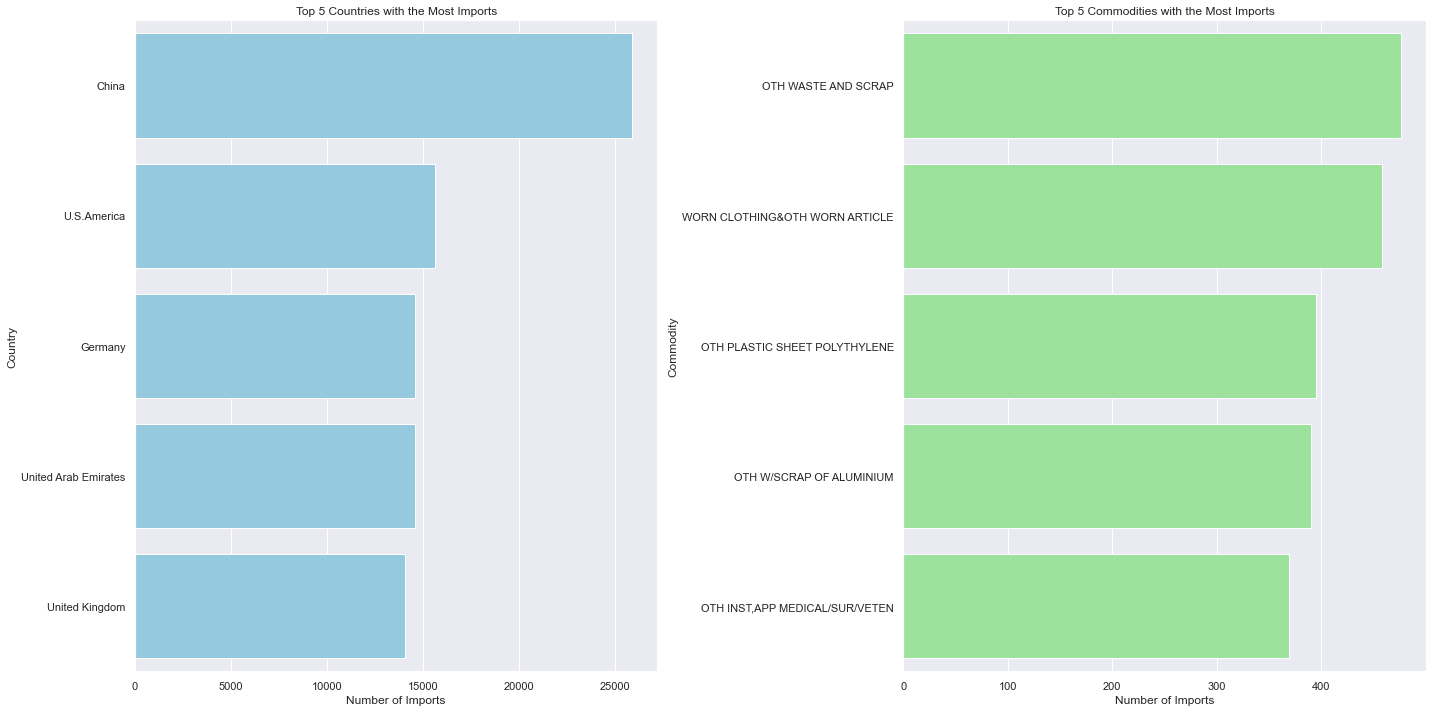

In [285]:
# Looking for most popular commodities and countries in import
Country_data = pd.DataFrame(imp_data['Country'].value_counts())
Commodity_data = pd.DataFrame(imp_data['Commodity'].value_counts())

# Create subplots with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

# Plot the top 5 countries
top_countries = Country_data.head(5)
sns.barplot(x=top_countries['Country'], y=top_countries.index, ax=ax1, color='skyblue')
ax1.set_title('Top 5 Countries with the Most Imports')
ax1.set_xlabel('Number of Imports')
ax1.set_ylabel('Country')

# Plot the top 5 commodities
top_commodities = Commodity_data.head(5)
sns.barplot(x=top_commodities['Commodity'], y=top_commodities.index, ax=ax2, color='lightgreen')
ax2.set_title('Top 5 Commodities with the Most Imports')
ax2.set_xlabel('Number of Imports')
ax2.set_ylabel('Commodity')

plt.tight_layout()  # adjust the layout
plt.show()


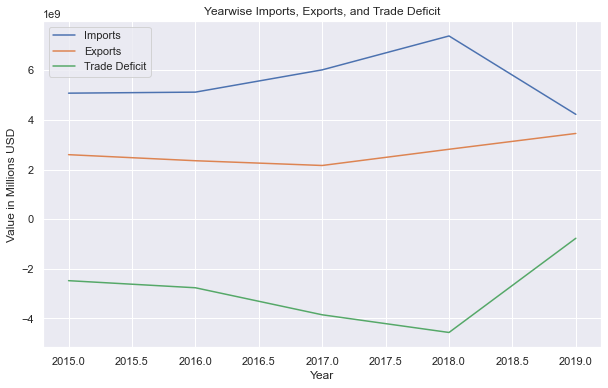

In [286]:
# Group the data by year and calculate the total imports and exports
df = imp_data.groupby(['Year']).agg(Value = ('Value','sum'))
df2 = exp_data.groupby(['Year']).agg(Value= ('Value','sum'))

# Calculate the trade deficit by subtracting exports from imports
df['Deficit'] = df2.Value - df.Value

# Set the format of numbers to display without scientific notation
pd.set_option('float_format','{:.0f}'.format)

# Create a line plot for the imports, exports, and deficit
plt.figure(figsize=(10,6))
plt.plot(df.index, df['Value'], label='Imports')
plt.plot(df2.index, df2['Value'], label='Exports')
plt.plot(df.index, df['Deficit'], label='Trade Deficit')

# Set the x and y axis labels and title
plt.xlabel('Year')
plt.ylabel('Value in Millions USD')
plt.title('Yearwise Imports, Exports, and Trade Deficit')
plt.legend()
plt.show()

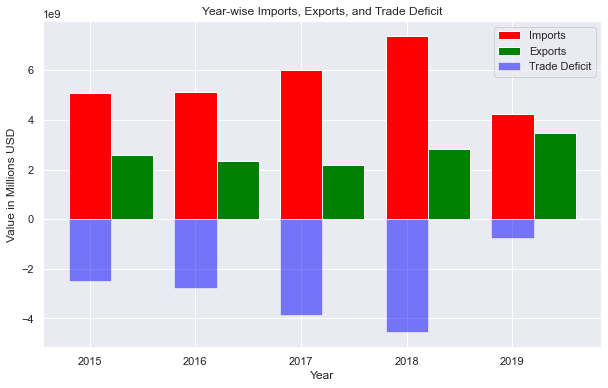

In [287]:
# Group the data by year and calculate the total imports and exports
df = imp_data.groupby(['Year']).agg(Value = ('Value','sum'))
df2 = exp_data.groupby(['Year']).agg(Value= ('Value','sum'))

# Calculate the trade deficit by subtracting exports from imports
df['Deficit'] = df2.Value - df.Value

# Set the format of numbers to display without scientific notation
pd.set_option('float_format','{:.0f}'.format)

# Create a bar plot for the imports, exports, and deficit
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(df.index, df['Value'], label='Imports', color='red', width=0.4)
ax.bar(df2.index + 0.4, df2['Value'], label='Exports', color='green', width=0.4)
ax.bar(df.index, df['Deficit'], label='Trade Deficit', color='blue', width=0.4, alpha=0.5)

# Set the x and y axis labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Value in Millions USD')
ax.set_title('Year-wise Imports, Exports, and Trade Deficit')
ax.legend()

plt.show()


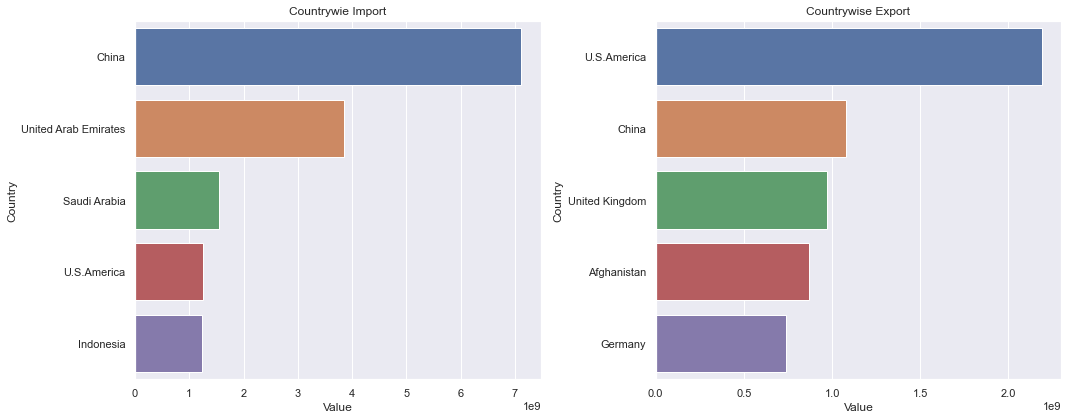

In [293]:
# Country wise imports and exports

df3 = imp_data.groupby(['Country']).agg(Value = ('Value','sum'))
df3 = df3.sort_values(by='Value', ascending = False)
df3 = df3[:5]

df4 = exp_data.groupby(['Country']).agg(Value = ('Value','sum'))
df4 = df4.sort_values(by = 'Value', ascending = False)
df4 = df4[:5]

sns.set(rc={'figure.figsize':(15,6)})
axis1 = plt.subplot(121)

sns.barplot(df3.Value, df3.index).set_title('Countrywie Import')

axis2 = plt.subplot(122)
sns.barplot(df4.Value, df4.index).set_title('Countrywise Export')

plt.tight_layout()
plt.show()

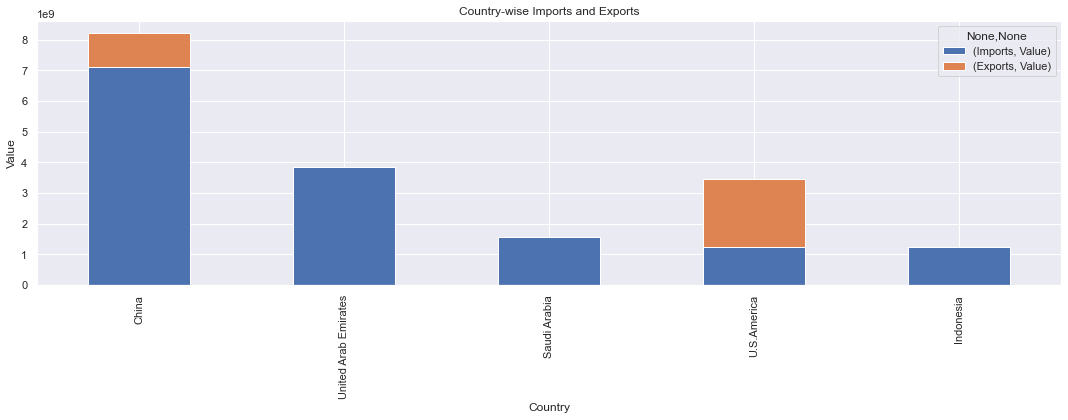

In [289]:
df5 = pd.concat([df3, df4], axis=1, keys=['Imports', 'Exports'])
df5 = df5.sort_values(('Imports', 'Value'), ascending=False)[:5]

sns.set(rc={'figure.figsize':(15,6)})
ax = df5.plot(kind='bar', stacked=True)

# set x-axis label
ax.set_xlabel('Country')

# set y-axis label
ax.set_ylabel('Value')

# set chart title
ax.set_title('Country-wise Imports and Exports')

plt.tight_layout()
plt.show()


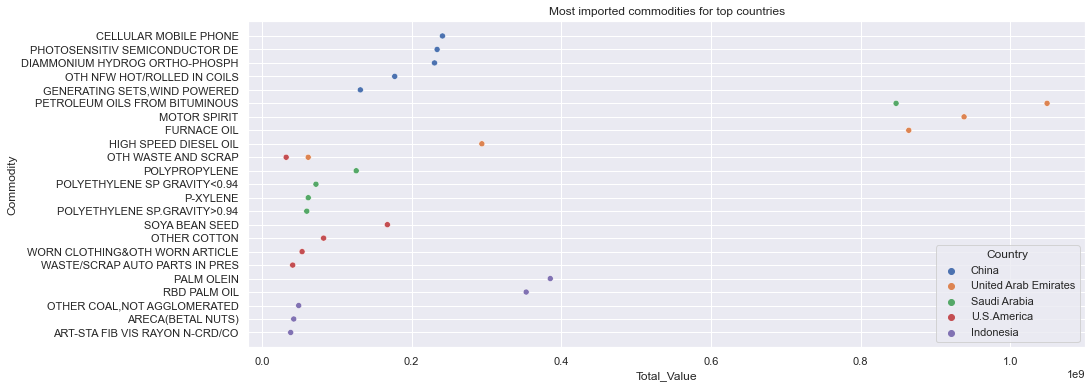

In [290]:
# A dataframe containing the top 5 countries and their most imported commodities
top_countries = imp_data.groupby(['Country']).agg(Total_Value = ('Value','sum'))
top_countries = top_countries.sort_values(by='Total_Value', ascending=False).head(5)
top_commodities = pd.DataFrame()
for country in top_countries.index:
    temp = imp_data[imp_data['Country'] == country].groupby(['Commodity']).agg(Total_Value = ('Value', 'sum')).sort_values(by='Total_Value', ascending=False).head(5)
    temp['Country'] = country
    top_commodities = pd.concat([top_commodities, temp])

# Plot the scatter plot
sns.scatterplot(x='Total_Value', y='Commodity', hue='Country', data=top_commodities)
plt.title('Most imported commodities for top countries')
plt.show()


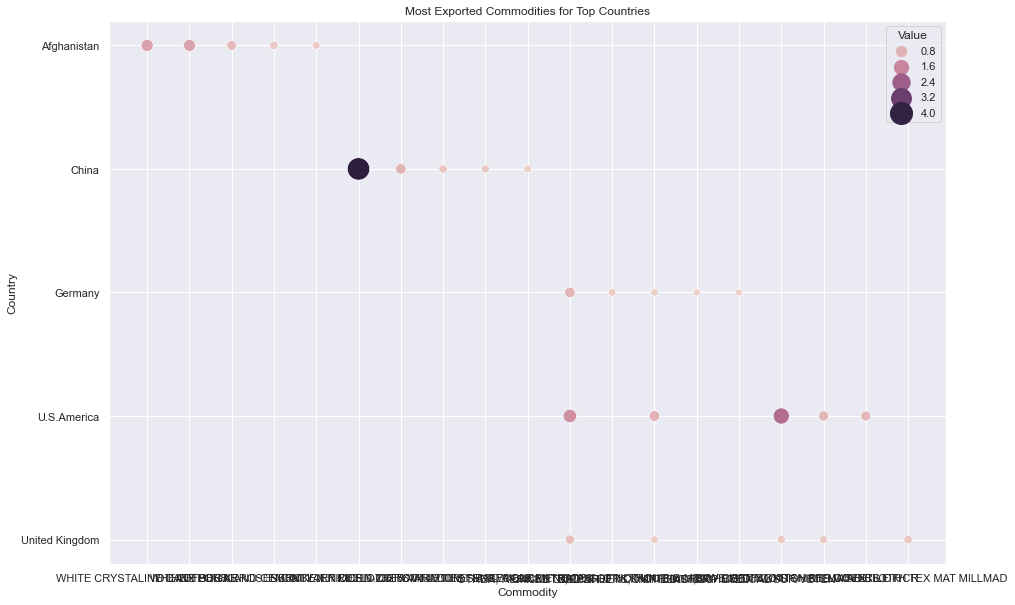

In [291]:
# A dataframe containing the top 5 countries and their most Exported commodities
df_exp = exp_data.groupby(['Country', 'Commodity']).agg(Value=('Value', 'sum')).reset_index()

# Get the top 5 countries by export value
top_countries_exp = df_exp.groupby('Country').agg(Total_Value=('Value', 'sum')).sort_values('Total_Value', ascending=False).head(5).index.tolist()

# Get the top 5 commodities for each of the top countries
df_exp_top = df_exp[df_exp['Country'].isin(top_countries_exp)].groupby('Country').apply(lambda x: x.nlargest(5, 'Value')).reset_index(drop=True)

# Plot the scatter plot
sns.set(rc={'figure.figsize':(15,10)})
sns.scatterplot(x='Commodity', y='Country', hue='Value', size='Value', data=df_exp_top, sizes=(50, 500))
plt.title('Most Exported Commodities for Top Countries')
plt.show()


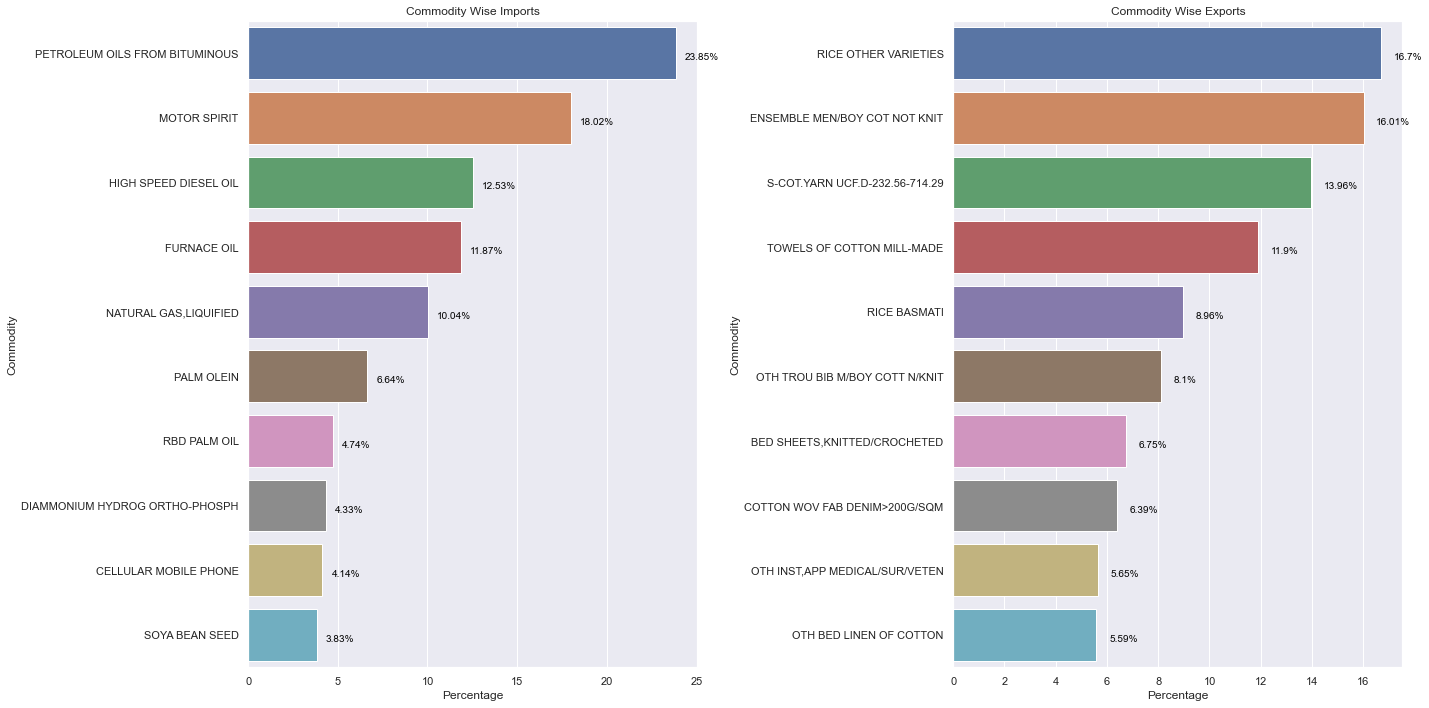

In [292]:
df = imp_data.groupby(['Commodity']).agg(Value=('Value','sum'))
df = df.sort_values(by='Value', ascending = False)
df = df[:10]
df['Percentage'] = df['Value']/df['Value'].sum() * 100

df2 = exp_data.groupby(['Commodity']).agg(Value=('Value','sum'))
df2 = df2.sort_values(by='Value', ascending=False)
df2 = df2[:10]
df2['Percentage'] = df2['Value']/df2['Value'].sum() * 100

sns.set(rc={'figure.figsize':(20,10)})
plt.subplot(1,2,1)
ax = sns.barplot(df['Percentage'], df.index)
ax.set_title('Commodity Wise Imports')
ax.set_xlabel('Percentage')
ax.set_ylabel('Commodity')
for i, v in enumerate(df['Percentage']):
    ax.text(v + 0.5, i + .10, str(round(v,2)) + '%', color='black', fontsize=10)

plt.subplot(1,2,2)
ax2 = sns.barplot(df2['Percentage'], df2.index)
ax2.set_title('Commodity Wise Exports')
ax2.set_xlabel('Percentage')
ax2.set_ylabel('Commodity')
for i, v in enumerate(df2['Percentage']):
    ax2.text(v + 0.5, i + .10, str(round(v,2)) + '%', color='black', fontsize=10)

plt.tight_layout()
plt.show()

### Follow

Github: https://www.github.com/ZaidArman 

Linkedin: https://www.linkedin.com/in/zaid-ullah07 

Twitter: https://www.twitter.com/ZaidArman_ 

Instagram: https://www.instagram.com/zaid__arman7 

Facebook: https://www.facebook.com/profile.php?id=100011010551170

Made by ❤️ Zaid Ullah ❤️